#### Notebook Imports

In [695]:
import datetime as dt
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

### Data Scrubbing and Organizing

In [696]:
#import CSV from project github
from matplotlib.dates import DateFormatter
covid19Dataframe = pd.read_csv("https://raw.githubusercontent.com/WhipSnake23/Python-Class-Project/main/Data/owid-covid-data.csv")

#scrub data from rolled up rows for each region globally. NOTE: ~=="not"
covid19Dataframe = covid19Dataframe[~covid19Dataframe.iso_code.str.contains("OWID")]

#Create a date field for Day, Month, Year to help with Data aggregation
covid19Dataframe.insert(59,'Day',pd.to_datetime(covid19Dataframe['date']),True)
covid19Dataframe.insert(60,'Month',pd.to_datetime(covid19Dataframe['date']),True)
covid19Dataframe.insert(61,'Year',pd.to_datetime(covid19Dataframe['date']),True)
covid19Dataframe.insert(62,'Year_Month',pd.to_datetime(covid19Dataframe['date']),True)
covid19Dataframe['Day'] = covid19Dataframe['Day'].dt.day
covid19Dataframe['Month'] = covid19Dataframe['Month'].dt.month
covid19Dataframe['Year'] = covid19Dataframe['Year'].dt.year
covid19Dataframe['Year_Month'] = pd.to_datetime(covid19Dataframe['Year'].astype(str) + '-' + covid19Dataframe['Month'].astype(str) + '-' +'01')
#Convert Date Column to Date and Time - NOTE: This may not be needed
covid19Dataframe['date'] = pd.to_datetime(covid19Dataframe['date'])
#Set Positivity Rate to an actual percentage
covid19Dataframe['positive_rate'] = covid19Dataframe['positive_rate'] * 100

### Total Deaths in Mexico

In [697]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
#Filter out only Mexico Data based on Country Code
covid19DataframeMexico = covid19Dataframe[covid19Dataframe["iso_code"]=="MEX"]
#Aggregate rows by Year-Month
covid19DataframeMexicoGrouped = covid19DataframeMexico.groupby(['Year_Month'], as_index=False)['total_deaths'].sum()
covid19DataframeMexicoGrouped.reset_index()
covid19DataframeMexicoGrouped
#X and Y Axis has to be in separate dataframes
#covid19DataframeMexicoDates = covid19DataframeMexicoGrouped["Year_Month"]
#covid19DataframeMexicoTotalDeaths = covid19DataframeMexicoGrouped["total_deaths"]

,Year_Month,total_deaths
0,2020-01-01,0.0
1,2020-02-01,0.0
2,2020-03-01,136.0
3,2020-04-01,19390.0
4,2020-05-01,165485.0
5,2020-06-01,562682.0
6,2020-07-01,1164238.0
7,2020-08-01,1749213.0
8,2020-09-01,2150492.0
9,2020-10-01,2649132.0


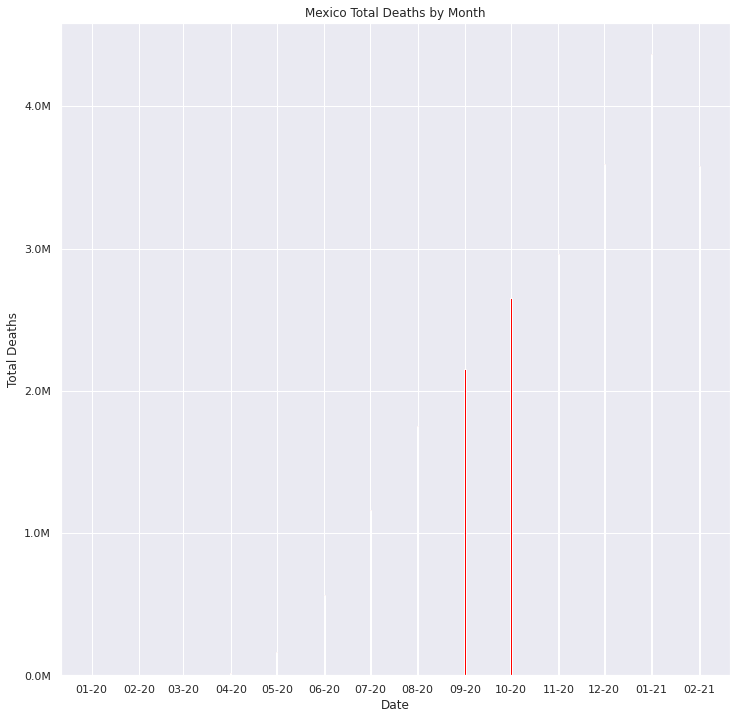

In [698]:
#Source: https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(covid19DataframeMexicoGrouped['Year_Month'],
       covid19DataframeMexicoGrouped['total_deaths'],
       color='red')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Total Deaths",
       title="Mexico Total Deaths by Month")

# Define the date format
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator())
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)
ax.grid(False)
plt.show()

### Total Deaths vs the Top 20 countries with the highest Median Age

In [699]:
##This code block will filter the data and get the top n of a column
countries = covid19Dataframe[['iso_code','median_age']]
countries = countries.drop_duplicates()
top20Countries_MedianAge = countries.nlargest(20,'median_age')
top20Countries_list = top20Countries_MedianAge['iso_code'].values.tolist()
booleanSeries = covid19Dataframe.iso_code.isin(top20Countries_list)
top20Countries_MedianAge = covid19Dataframe[booleanSeries]


top20Countries_MedianAge = top20Countries_MedianAge[['location','date','total_deaths','median_age']]
#This gets one row per location to get the most recent row which has Total Deaths
##Needs work for Null Values
top20Countries_MedianAge = top20Countries_MedianAge[top20Countries_MedianAge.groupby('location').date.transform('max') == top20Countries_MedianAge['date']]

Text(0.5, 1.0, 'Total Deaths vs Top 20 Countries with the Highest Median Age')

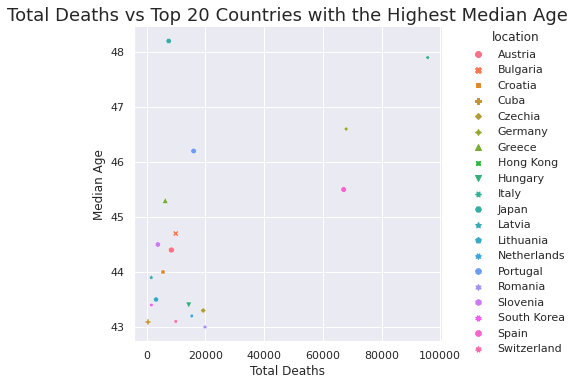

In [700]:
sns.set_theme()

# Create a visualization
sns.relplot(
    data=top20Countries_MedianAge,
    x="total_deaths", y="median_age",
    hue="location", style="location",
)
#plt.figure(figsize=(10,6))
plt.xlabel("Total Deaths")
plt.ylabel("Median Age")
plt.title("Total Deaths vs Top 20 Countries with the Highest Median Age", size=18)

### Total Deaths vs the Top 20 countries with the highest population density

In [701]:
countries = covid19Dataframe[['iso_code','population_density']]
countries = countries.drop_duplicates()
top20Countries_PopD = countries.nlargest(20,'population_density')
top20Countries_list = top20Countries_PopD['iso_code'].values.tolist()
booleanSeries = covid19Dataframe.iso_code.isin(top20Countries_list)
top20Countries_PopD = covid19Dataframe[booleanSeries]
top20Countries_PopD = top20Countries_PopD[['location','date','total_deaths','population_density']]
top20Countries_PopD = top20Countries_PopD[top20Countries_PopD.groupby('location').date.transform('max') == top20Countries_PopD['date']]


In [702]:
fig = px.scatter(top20Countries_PopD, x="total_deaths", y="population_density", color="location",
                 title="Total Deaths vs Top 20 Countries with the Highest Population Density",
                 labels={
                     "total_deaths" : "Total Deaths",
                    "population_density" : "Population Density",
                     "location" : "Country"
                    } #Labels are customized using the above dictionary type configuration
                )

fig.show()

### Italy's Positivity Rate

In [703]:
covid19DataframeItaly = covid19Dataframe[covid19Dataframe["iso_code"]=="ITA"]
covid19DataframeItalyGrouped = covid19DataframeItaly.groupby(['Year_Month'], as_index=False)['positive_rate'].mean()
covid19DataframeItalyGrouped.sort_values(by=['Year_Month'])
covid19DataframeItalyGrouped
fig = px.line(covid19DataframeItalyGrouped, x="Year_Month", y="positive_rate", title='Italy Positivty Rate',  labels={
                  "positive_rate" : "Total Deaths",
                "Year_Month" : "Month"
               } )
fig.show()
